# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Importing modules and libraries</p>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Loading Data</p>

In [2]:
data=pd.read_csv('/kaggle/input/cloths-price-dataset/hello (1).csv')

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Data Cleaning </p>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36391 entries, 0 to 36390
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RATE              36391 non-null  float64
 1   GROSS AMT         36391 non-null  float64
 2   PCS               36391 non-null  int64  
 3   Style             36391 non-null  object 
 4   Discount/Charges  36391 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.4+ MB


In [4]:
data.duplicated().sum()

24170

In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12221 entries, 0 to 36390
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RATE              12221 non-null  float64
 1   GROSS AMT         12221 non-null  float64
 2   PCS               12221 non-null  int64  
 3   Style             12221 non-null  object 
 4   Discount/Charges  12221 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 572.9+ KB


In [7]:
data.Style.nunique()

1064

In [8]:
tp30=data.Style.value_counts(ascending=False)[:30]

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Data Visualisation </p>

<p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: #008080; font-size: 25px; text-align: center; padding: 0px; border-bottom: 3px solid #008080;">Top 30 Products</p>


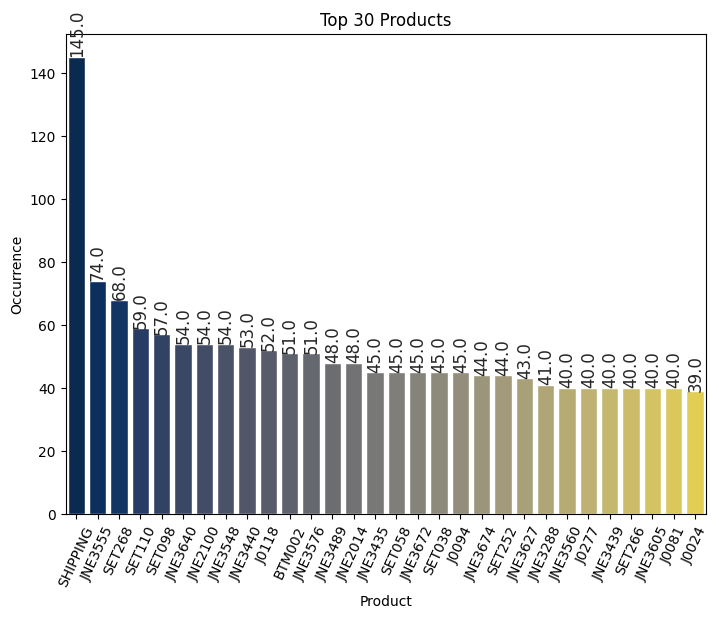

In [9]:
fig1=plt.figure()
axis=fig1.add_axes([1,1,1,1])
sb.set()
sb.barplot(x=tp30.index,y=tp30,palette='cividis',ax=axis)
plt.xticks(rotation=65)
plt.title('Top 30 Products')
plt.ylabel('Occurrence')
plt.xlabel('Product')
for i in axis.patches:
    axis.text(i.get_x(),i.get_height(),i.get_height(),rotation=90,va='bottom')

<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    
    
    
    
- **The products bought by variety of peoples**

<p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: #008080; font-size: 25px; text-align: center; padding: 0px; border-bottom: 3px solid #008080;">Costliest products in each style(Top 30 Styles)</p>


Text(0.5, 1.0, 'Costliest products in each style(Top 30 Styles)')

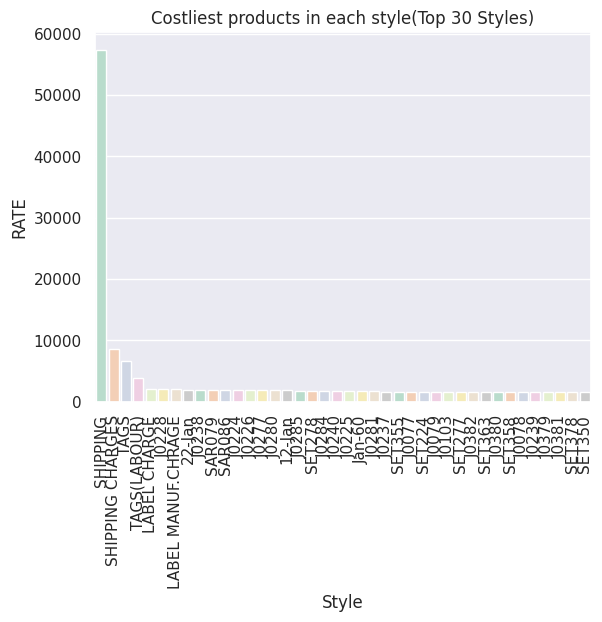

In [10]:
val=data.groupby('Style')['RATE'].max().sort_values(ascending=False)
val=val.head(40)
sb.barplot(y=val,x=val.index,palette='Pastel2')
plt.xticks(rotation=90)
plt.title('Costliest products in each style(Top 30 Styles)')

Text(0.5, 1.0, 'Top 100 Popular Styles')

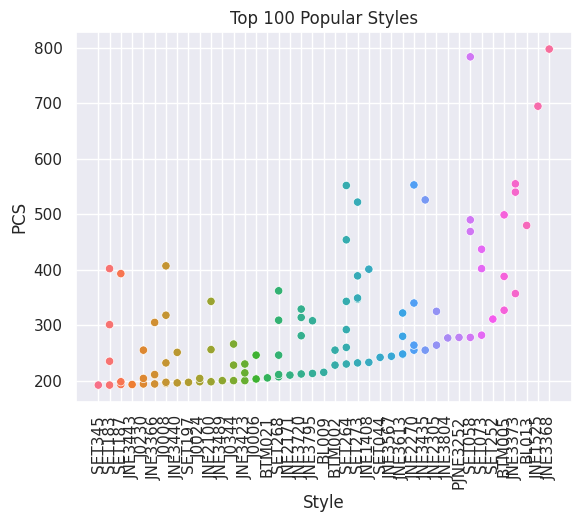

In [11]:
val1=data[['PCS','Style']].sort_values(by='PCS',ascending=False).drop_duplicates().query('PCS !=0').head(100).sort_values(by='PCS')
sb.scatterplot(data=val1,x='Style',y='PCS',hue='Style',legend=False)
plt.xticks(rotation=90)
plt.title('Top 100 Popular Styles')

Text(0.5, 1.0, 'Top 100 Discounted Styles')

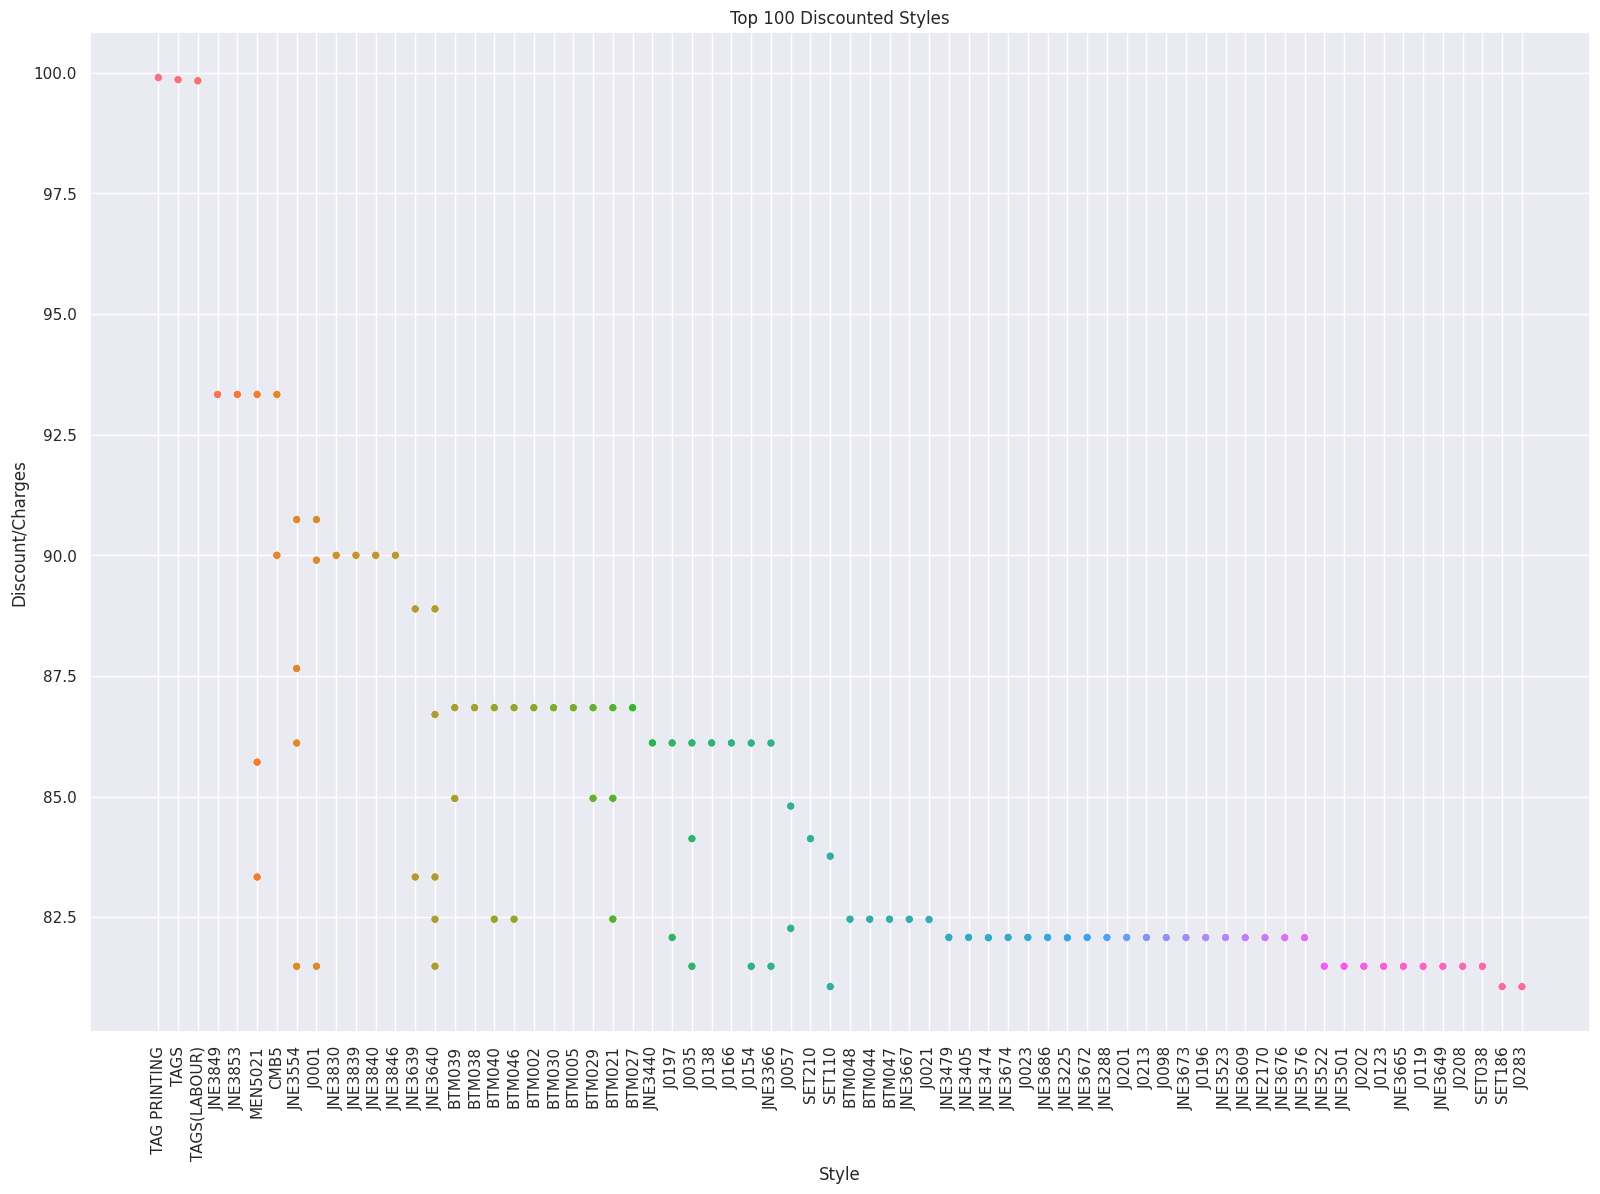

In [12]:
val2=data[['Discount/Charges','Style']].sort_values(by='Discount/Charges',ascending=False).drop_duplicates().head(100)
fig3=plt.figure(figsize=(15,10))
axis=fig3.add_axes([1,1,1,1])
sb.scatterplot(data=val2,x='Style',y='Discount/Charges',hue='Style',legend=False,ax=axis)
plt.xticks(rotation=90)
plt.title('Top 100 Discounted Styles')

In [13]:
gpdata=data[['PCS','Style']].groupby('PCS')

In [14]:
dtgp=gpdata.groups


In [15]:
list1=[]
for i,j in dtgp.items():
    list1.append((i,len(j)))

In [16]:
newdata=sorted(list1,key=lambda X:X[0],reverse=True)[:40]

In [17]:
lqproduct=[]
for i in newdata:
    df=data.query('PCS==%d'%(i[0]))
    lqproduct.append((df.Style.drop_duplicates(),i[0]))

In [18]:
style,count=[],[]

for i in range(len(lqproduct)):
    style.append(lqproduct[i][0].values[0])
    count.append(lqproduct[i][1])

<p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: #008080; font-size: 25px; text-align: center; padding: 0px; border-bottom: 3px solid #008080;">Product bought with huge quantity</p>


Text(0, 0.5, 'Purchase Count')

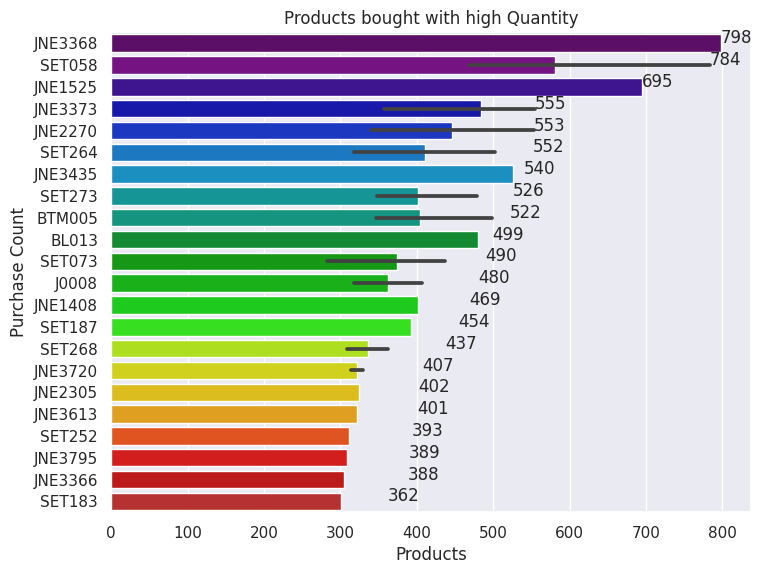

In [19]:
fig=plt.figure()
axis=fig.add_axes([1,1,1,1])
sb.barplot(x=count,y=style,ax=axis,palette='nipy_spectral')
for i in range(len(style)):
    axis.annotate(count[i],(count[i],i))
plt.title('Products bought with high Quantity')
plt.xlabel('Products')
plt.ylabel('Purchase Count')

<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

    
    
- **The above plot shows the product bought with high quantity**

In [20]:
data.iloc[:,0:2].sum()

RATE          9330355.09
GROSS AMT    11821711.69
dtype: float64

In [21]:
print('Total Discount % :',100-(9330355.09/11821711.69)*100)

Total Discount % : 21.074415155188078


<p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: #008080; font-size: 25px; text-align: center; padding: 0px; border-bottom: 3px solid #008080;">Discounted Percentage Pie Chart</p>


Text(0.5, 1.0, 'Discounted Percentage Pie Chart')

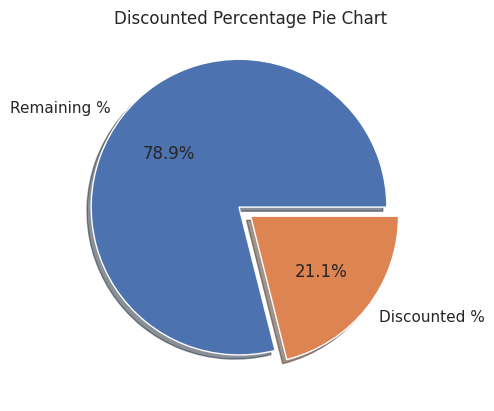

In [22]:
plt.pie([(9330355.09/11821711.69)*100,100-(9330355.09/11821711.69)*100],labels=['Remaining %','Discounted %'],autopct="%1.1f%%",shadow=True,explode=(0.1,0))
plt.title('Discounted Percentage Pie Chart')

<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">




- **Shows the total discount percentage**

In [23]:
newdf=data.sort_values(by='RATE',ascending=False)

In [24]:
newdf.describe()

,RATE,GROSS AMT,PCS,Discount/Charges
count,12221.000000,12221.000000,12221.000000,12221.000000
mean,763.469036,967.327689,28.051060,8.940016
std,1068.206562,1233.881287,57.477774,24.337188
min,2.000000,100.000000,0.000000,-13.676149
25%,462.500000,487.000000,1.000000,-3.021978
50%,598.750000,681.000000,5.000000,0.000000
75%,850.000000,1039.000000,32.000000,0.026483
max,57400.000000,57400.000000,798.000000,99.900000


In [25]:
values=[0,100,500,1000,2000,3000,6000,10000,30000,50000,100000]
bins=pd.cut(newdf.RATE,values)

In [26]:
newdf['RATE Interval']=bins

In [27]:
data1=newdf['RATE Interval'].value_counts()

In [28]:
data1

RATE Interval
(500, 1000]        6335
(100, 500]         4113
(1000, 2000]       1624
(3000, 6000]         60
(6000, 10000]        33
(2000, 3000]         30
(10000, 30000]       20
(0, 100]              4
(30000, 50000]        1
(50000, 100000]       1
Name: count, dtype: int64

<p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: #008080; font-size: 25px; text-align: center; padding: 0px; border-bottom: 3px solid #008080;">Swarm Plot</p>


Text(0.5, 1.0, 'Swarm Plot For Price Distribution')

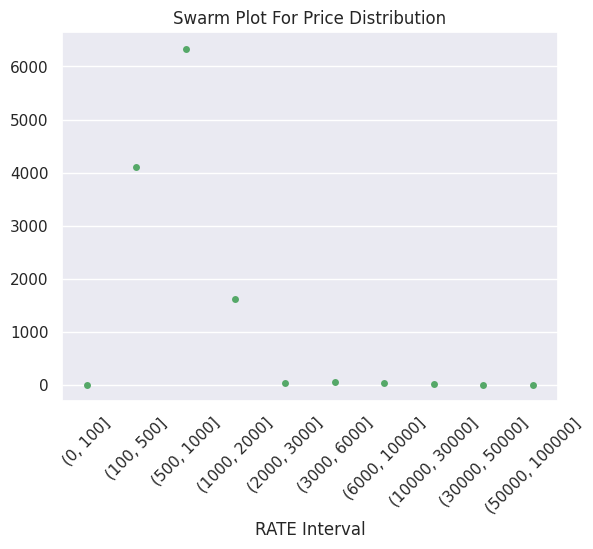

In [29]:
# Swarm plot
sb.swarmplot(x=data1.index, y=data1.values,color='g')

plt.xticks(rotation=45)
plt.title('Swarm Plot For Price Distribution')


- **100-500 range products are bought more**

<div style="border-bottom: 2px solid #4F200D; padding-bottom: 8px;">
    <p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: #2C3E50; font-size: 30px; text-align: left; margin: 0; padding-left: 10px;">Distributions of different features</p>
</div>


In [30]:
from matplotlib import cm
c3=cm.get_cmap('plasma')

In [31]:
col=data.columns
colr=[c3(0.0),c3(0.3),c3(0.6),c3(0.9),c3(0.7)]

(0.0, 5000.0)

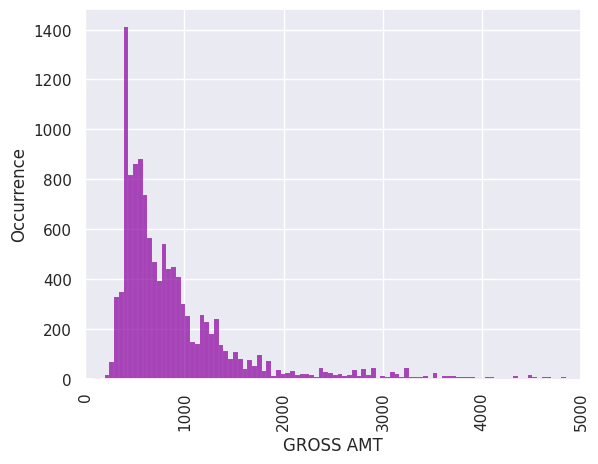

In [32]:

sb.histplot(x=data[col[1]],color=colr[1])
     
plt.xticks(rotation=90)
plt.ylabel('Occurrence')

plt.xlim(0,5000)

(0.0, 3000.0)

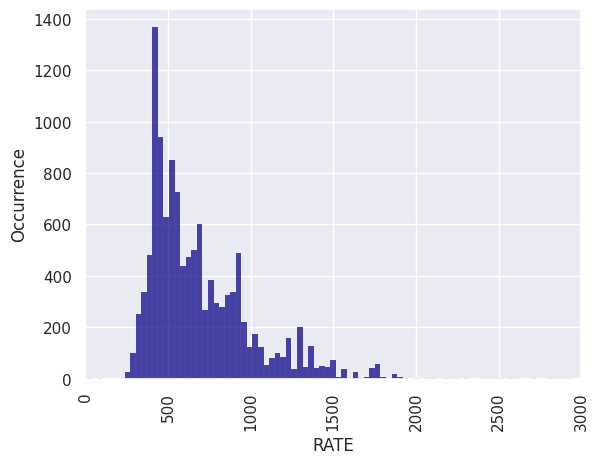

In [33]:
sb.histplot(x=data[col[0]],color=colr[0])
     
plt.xticks(rotation=90)
plt.ylabel('Occurrence')
plt.xlim(0,3000)

(0.0, 150.0)

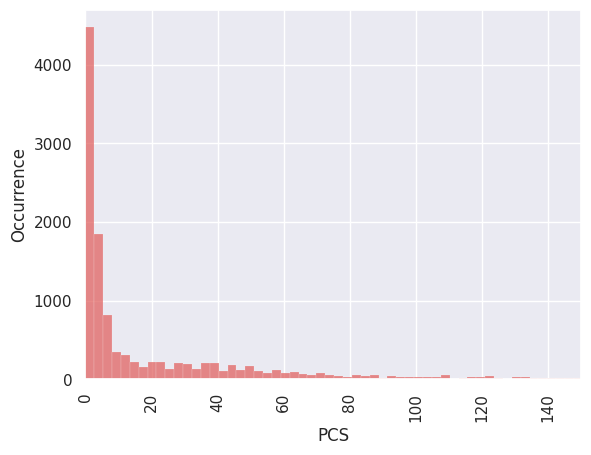

In [34]:
sb.histplot(x=data[col[2]],color=colr[2])
     
plt.xticks(rotation=90)
plt.ylabel('Occurrence')
plt.xlim(0,150)

Text(0, 0.5, 'Occurrence')

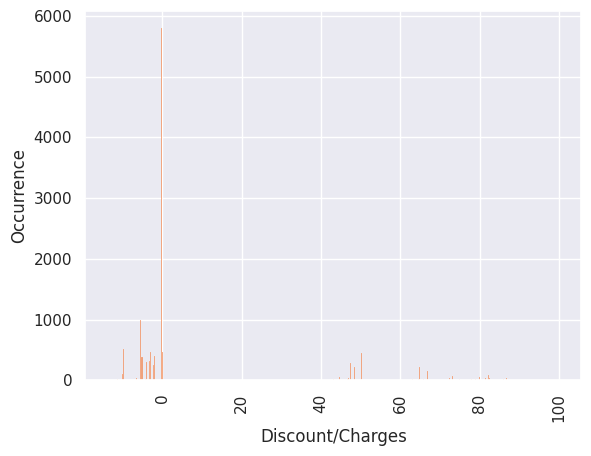

In [35]:
sb.histplot(x=data[col[4]],color=colr[4])
     
plt.xticks(rotation=90)
plt.ylabel('Occurrence')


<div style="border-radius: 10px; border: #3498db solid; padding: 15px; background-color: #ecf0f1; font-size: 300%; text-align: left; color: #2c3e50;">
   Thank You
</div>
